In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data = data.drop(columns=['RowNumber','CustomerId','Surname'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [5]:
x = data.drop(columns=['Exited'])
y = data[['Exited']]

In [6]:
y['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
len(y)

10000

In [8]:
len(x)

10000

In [9]:
from imblearn.over_sampling import RandomOverSampler
oversampling = RandomOverSampler()
x,y = oversampling.fit_resample(x,y)

In [10]:
y['Exited'].value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [11]:
len(y)

15926

In [12]:
len(x)

15926

In [13]:
# import pickle
# with open('oversampler.pkl','wb') as file:
#     pickle.dump(oversampling,file)

In [14]:
numerical_columns = [feature for feature in x.columns if x[feature].dtype!='object']
numerical_columns

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [15]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [17]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [18]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,587,Germany,Male,35,5,121863.61,1,1,1,23481.69
1,754,Germany,Male,57,2,101134.87,2,1,1,70954.41
2,476,France,Male,37,4,0.00,1,1,1,55775.84
3,596,France,Male,42,7,0.00,2,1,1,121568.37
4,478,France,Female,38,4,171913.87,1,1,0,51820.87


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])

In [20]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.634182,Germany,Male,-0.583252,0.003316,0.643349,-0.760977,0.649021,1.094722,-1.338589
1,1.071999,Germany,Male,1.504331,-1.029816,0.304959,0.713092,0.649021,1.094722,-0.512717
2,-1.768230,France,Male,-0.393471,-0.341062,-1.346038,-0.760977,0.649021,1.094722,-0.776775
3,-0.542232,France,Male,0.080979,0.692070,-1.346038,0.713092,0.649021,1.094722,0.367802
4,-1.747797,France,Female,-0.298581,-0.341062,1.460405,-0.760977,0.649021,-0.913474,-0.845579


In [21]:
# x_train = pd.get_dummies(x_train,columns=['Geography','Gender'],drop_first=True,dtype=int)
# x_train.head()
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
label_encoder = LabelEncoder()
x_train['Gender'] = label_encoder.fit_transform(x_train['Gender'])
x_train.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.634182,Germany,1,-0.583252,0.003316,0.643349,-0.760977,0.649021,1.094722,-1.338589
1,1.071999,Germany,1,1.504331,-1.029816,0.304959,0.713092,0.649021,1.094722,-0.512717
2,-1.768230,France,1,-0.393471,-0.341062,-1.346038,-0.760977,0.649021,1.094722,-0.776775
3,-0.542232,France,1,0.080979,0.692070,-1.346038,0.713092,0.649021,1.094722,0.367802
4,-1.747797,France,0,-0.298581,-0.341062,1.460405,-0.760977,0.649021,-0.913474,-0.845579


In [22]:
one_hot_encoder = OneHotEncoder()
one_hot_encoded_array = one_hot_encoder.fit_transform(x_train[['Geography']]).toarray()
one_hot_encoded_array

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [23]:
# x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])
# x_test = pd.get_dummies(x_test,columns=['Geography','Gender'],drop_first=True,dtype=int)
# x_test.head()
one_hot_encoder.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [24]:
x_train.shape

(11944, 10)

In [25]:
one_hot_encoded_dataframe = pd.DataFrame(one_hot_encoded_array,columns=one_hot_encoder.get_feature_names_out(['Geography'])).astype(int)
one_hot_encoded_dataframe.head()

,Geography_France,Geography_Germany,Geography_Spain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
# one_hot_encoded_dataframe = one_hot_encoded_dataframe.astype(int)
# one_hot_encoded_dataframe.head()
one_hot_encoded_dataframe.shape

(11944, 3)

In [27]:
x_train = pd.concat([x_train.drop(columns=['Geography']),one_hot_encoded_dataframe],axis=1)
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.634182,1,-0.583252,0.003316,0.643349,-0.760977,0.649021,1.094722,-1.338589,0,1,0
1,1.071999,1,1.504331,-1.029816,0.304959,0.713092,0.649021,1.094722,-0.512717,0,1,0
2,-1.768230,1,-0.393471,-0.341062,-1.346038,-0.760977,0.649021,1.094722,-0.776775,1,0,0
3,-0.542232,1,0.080979,0.692070,-1.346038,0.713092,0.649021,1.094722,0.367802,1,0,0
4,-1.747797,0,-0.298581,-0.341062,1.460405,-0.760977,0.649021,-0.913474,-0.845579,1,0,0


In [28]:
x_test['Gender'] = label_encoder.transform(x_test['Gender'])

In [29]:
one_hot_encoded_array_test = one_hot_encoder.transform(x_test[['Geography']]).toarray()
one_hot_encoded_array_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [30]:
one_hot_encoded_dataframe_test = pd.DataFrame(one_hot_encoded_array_test,columns=one_hot_encoder.get_feature_names_out(['Geography'])).astype(int)
one_hot_encoded_dataframe_test.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [31]:
x_test = pd.concat([x_test.drop(columns='Geography'),one_hot_encoded_dataframe_test],axis=1)
x_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,535,0,29,5,0.00,2,0,1,52709.55,1,0,0
1,606,0,41,4,132670.53,1,1,0,156476.36,0,1,0
2,680,0,31,9,119825.75,2,1,1,101139.30,0,0,1
3,588,0,30,0,110148.49,1,1,0,5790.90,0,1,0
4,686,0,39,4,157731.60,2,1,0,162820.60,0,1,0


In [32]:
import pickle
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

with open('label_encoder.pkl','wb') as file:
    pickle.dump(label_encoder,file)

with open('one_hot_encoder.pkl','wb') as file:
    pickle.dump(one_hot_encoder,file)

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [34]:
model = Sequential([
    Dense(units = 128,activation = 'relu', input_shape=(x_train.shape[1],)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(units = 64,activation = 'relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(units = 32,activation = 'relu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(units=1,activation='sigmoid')
])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

In [36]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.BinaryCrossentropy()

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
import datetime
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [39]:
early_stopping = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True,min_delta=0.01,verbose=1)

In [40]:
history= model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[tensorflow_callback,early_stopping],epochs=100)

Epoch 1/100


374/374 [==============================] - 6s 8ms/step - loss: 0.6587 - accuracy: 0.6377 - val_loss: 12631.8613 - val_accuracy: 0.4887
Epoch 2/100
374/374 [==============================] - 2s 6ms/step - loss: 0.5775 - accuracy: 0.7027 - val_loss: 24446.5312 - val_accuracy: 0.4887
Epoch 3/100
374/374 [==============================] - 2s 6ms/step - loss: 0.5398 - accuracy: 0.7328 - val_loss: 28861.0488 - val_accuracy: 0.4887
Epoch 4/100
374/374 [==============================] - 2s 6ms/step - loss: 0.5203 - accuracy: 0.7477 - val_loss: 38782.4102 - val_accuracy: 0.4887
Epoch 5/100
374/374 [==============================] - 2s 6ms/step - loss: 0.5061 - accuracy: 0.7563 - val_loss: 28806.5723 - val_accuracy: 0.4887
Epoch 6/100
374/374 [==============================] - 2s 6ms/step - loss: 0.5004 - accuracy: 0.7589 - val_loss: 22785.7461 - val_accuracy: 0.4887
Epoch 7/100
374/374 [==============================] - 2s 7ms/step - loss: 0.4963 - accuracy: 0.7594 - val_loss: 270

In [41]:
model.save("model.h5")

In [42]:
%load_ext tensorboard

In [43]:
# %tensorboard --logdir logs/fit20250729-012431

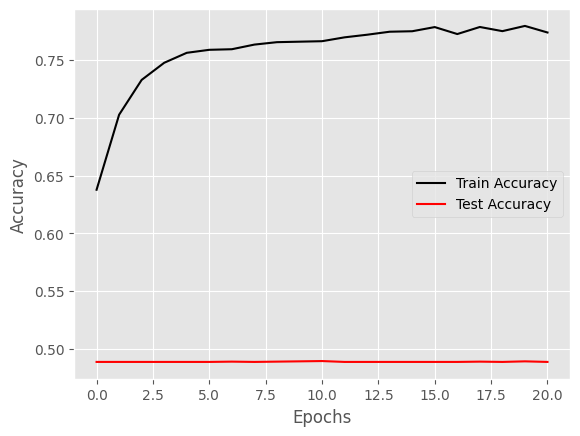

In [44]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.plot(np.arange(0,len(history.history['val_loss'])),history.history['accuracy'],label='Train Accuracy',color='black')
plt.plot(np.arange(0,len(history.history['val_loss'])),history.history['val_accuracy'],label='Test Accuracy',color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

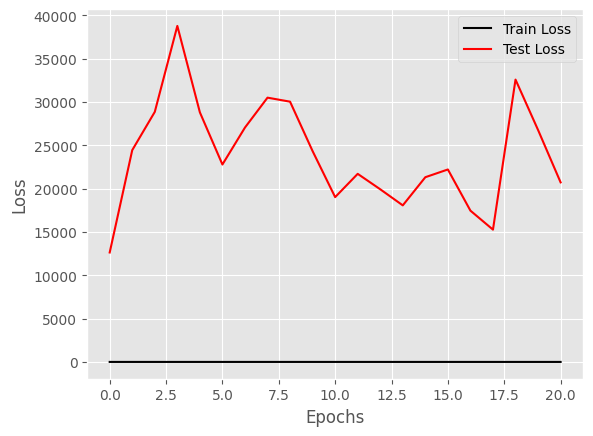

In [45]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.plot(np.arange(0,len(history.history['val_loss'])),history.history['loss'],label='Train Loss',color='black')
plt.plot(np.arange(0,len(history.history['val_loss'])),history.history['val_loss'],label='Test Loss',color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()